In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload the Excel file manually

import pandas as pd
df = pd.read_excel('cleaned_restaurant_data.xlsx')

Saving cleaned_restaurant_data.xlsx to cleaned_restaurant_data (2).xlsx


In [ ]:
df.head()

name    city    rating                     cuisine  \
0     AB FOODS POINT  Abohar  3.905141            Beverages,Pizzas   
1  Janta Sweet House  Abohar  4.400000               Sweets,Bakery   
2  theka coffee desi  Abohar  3.800000                   Beverages   
3          Singh Hut  Abohar  3.700000            Fast Food,Indian   
4      GRILL MASTERS  Abohar  3.905141  Italian-American,Fast Food   

                                                link  \
0  https://www.swiggy.com/restaurants/ab-foods-po...   
1  https://www.swiggy.com/restaurants/janta-sweet...   
2  https://www.swiggy.com/restaurants/theka-coffe...   
3  https://www.swiggy.com/restaurants/singh-hut-n...   
4  https://www.swiggy.com/restaurants/grill-maste...   

                                             address                  item  \
0  AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...     Aloo Tikki Burger   
1  Janta Sweet House, Bazar No.9, Circullar Road,...     Veg Creamy Burger   
2         theka coffee desi, sahtiya sadan road city   Cheese Burst Burger   
3    Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR  Paneer Creamy Burger   
4  GRILL MASTERS, ADA Heights, Abohar - Hanumanga...        Maxican Burger   

  order_date  sales_amount    month  year  age  gender marital_status  \
0 2017-10-10         41241  October  2017   20  Female         Single   
1 2018-05-08          2100      May  2018   24  Female         Single   
2 2018-04-06           875    April  2018   22    Male         Single   
3 2018-04-11           583    April  2018   22  Female         Single   
4 2018-06-18          7176     June  2018   22    Male         Single   

  occupation  month_num   pincode state  
0    Student         10       NaN   NaN  
1    Student          5       NaN   NaN  
2    Student          4       NaN   NaN  
3    Student          4       NaN   NaN  
4    Student          6  152116.0   NaN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   name            100000 non-null  object        
 1   city            100000 non-null  object        
 2   rating          100000 non-null  float64       
 3   cuisine         100000 non-null  object        
 4   link            100000 non-null  object        
 5   address         100000 non-null  object        
 6   item            100000 non-null  object        
 7   order_date      100000 non-null  datetime64[ns]
 8   sales_amount    100000 non-null  int64         
 9   month           100000 non-null  object        
 10  year            100000 non-null  int64         
 11  age             100000 non-null  int64         
 12  gender          100000 non-null  object        
 13  marital_status  100000 non-null  object        
 14  occupation      100000 non-null  obje

In [ ]:
df.describe()

rating                     order_date  sales_amount  \
count  100000.000000                         100000  1.000000e+05   
mean        3.905141  2019-01-10 19:37:41.375999744  5.189359e+03   
min         1.000000            2017-10-04 00:00:00 -1.000000e+00   
25%         3.905141            2018-05-14 00:00:00  1.710000e+02   
50%         3.905141            2018-12-24 00:00:00  5.190000e+02   
75%         3.905141            2019-09-03 00:00:00  2.847000e+03   
max         5.000000            2020-06-26 00:00:00  1.510944e+06   
std         0.298394                            NaN  2.284853e+04   

                year            age      month_num        pincode  
count  100000.000000  100000.000000  100000.000000   66489.000000  
mean     2018.542370      24.628580       6.349980  439368.218051  
min      2017.000000      18.000000       1.000000      90.000000  
25%      2018.000000      23.000000       3.000000  201012.000000  
50%      2018.000000      24.000000       6.000000  500081.000000  
75%      2019.000000      26.000000      10.000000  600040.000000  
max      2020.000000      33.000000      12.000000  999999.000000  
std         0.854513       2.971743       3.552354  217668.480567

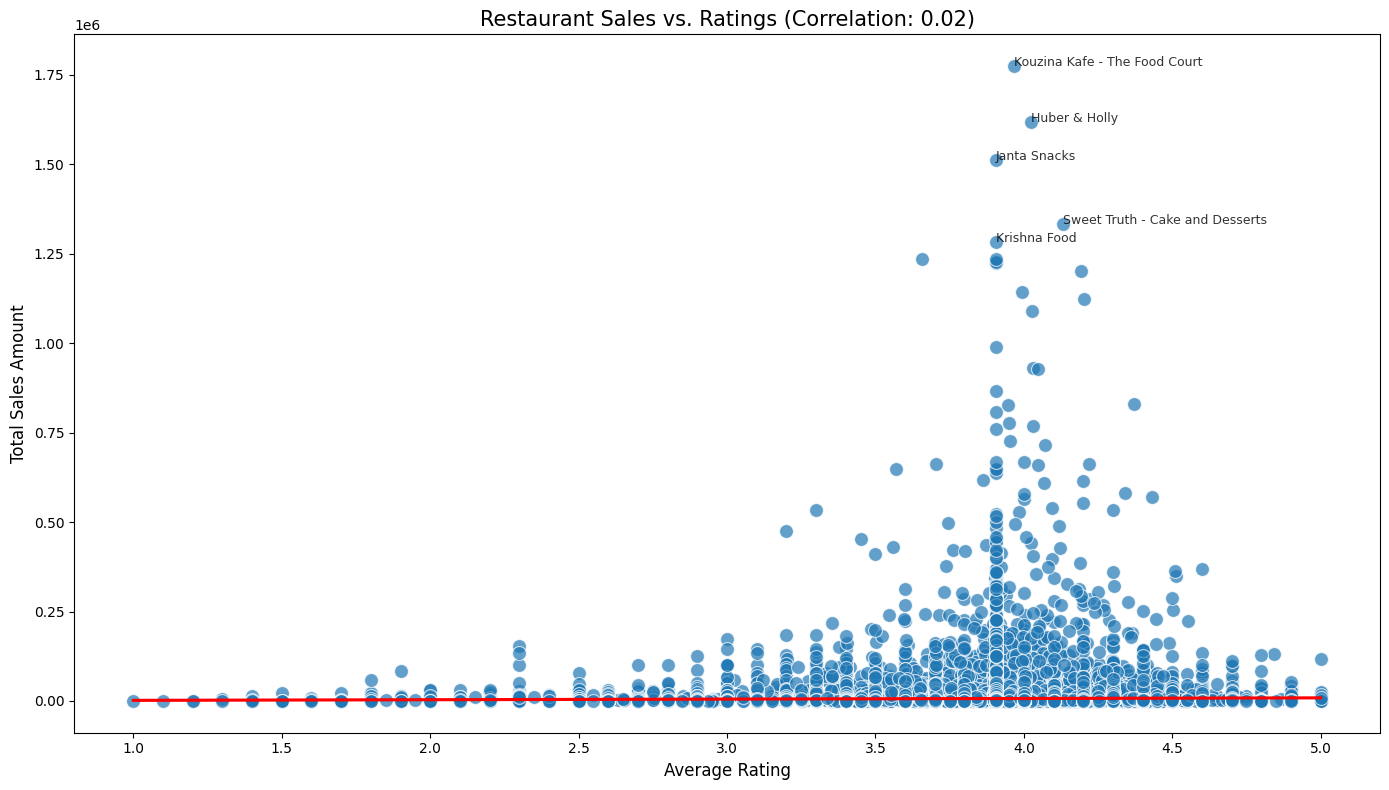

Top 10 Restaurants by Sales Volume:
                                  name  sales_amount    rating
36040    Kouzina Kafe - The Food Court       1774735  3.966089
30124                    Huber & Holly       1618439  4.025000
32397                     Janta Snacks       1510944  3.905141
63936  Sweet Truth - Cake and Desserts       1332118  4.131358
36161                     Krishna Food       1284102  3.905141
50312                        Pizza Hut       1236502  3.655933
74775                     ZAATAR SPICE       1235347  3.905141
47115          Odeon Gupta Paan Palace       1228148  3.905141
11623                       CHAI THELA       1224144  3.905141
19754                   Domino's Pizza       1201303  4.192416


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Group by restaurant and calculate metrics
restaurant_performance = df.groupby('name').agg({
    'sales_amount': 'sum',
    'rating': 'mean'
}).reset_index()

# Sort by total sales
top_restaurants = restaurant_performance.sort_values('sales_amount', ascending=False).head(15)

# Correlation between rating and sales
correlation = restaurant_performance['sales_amount'].corr(restaurant_performance['rating'])

# Plotting
plt.figure(figsize=(14, 8))
sns.scatterplot(data=restaurant_performance, x='rating', y='sales_amount',
                s=100, alpha=0.7)

# Regression line
sns.regplot(data=restaurant_performance, x='rating', y='sales_amount',
            scatter=False, color='red')

plt.title(f'Restaurant Sales vs. Ratings (Correlation: {correlation:.2f})', fontsize=15)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Total Sales Amount', fontsize=12)

# Annotate top 5 restaurants
for i, row in top_restaurants.head().iterrows():
    plt.annotate(row['name'], (row['rating'], row['sales_amount']),
                 fontsize=9, alpha=0.8)

plt.tight_layout()
plt.show()

# Top 10 printout
print("Top 10 Restaurants by Sales Volume:")
print(top_restaurants.head(10)[['name', 'sales_amount', 'rating']])


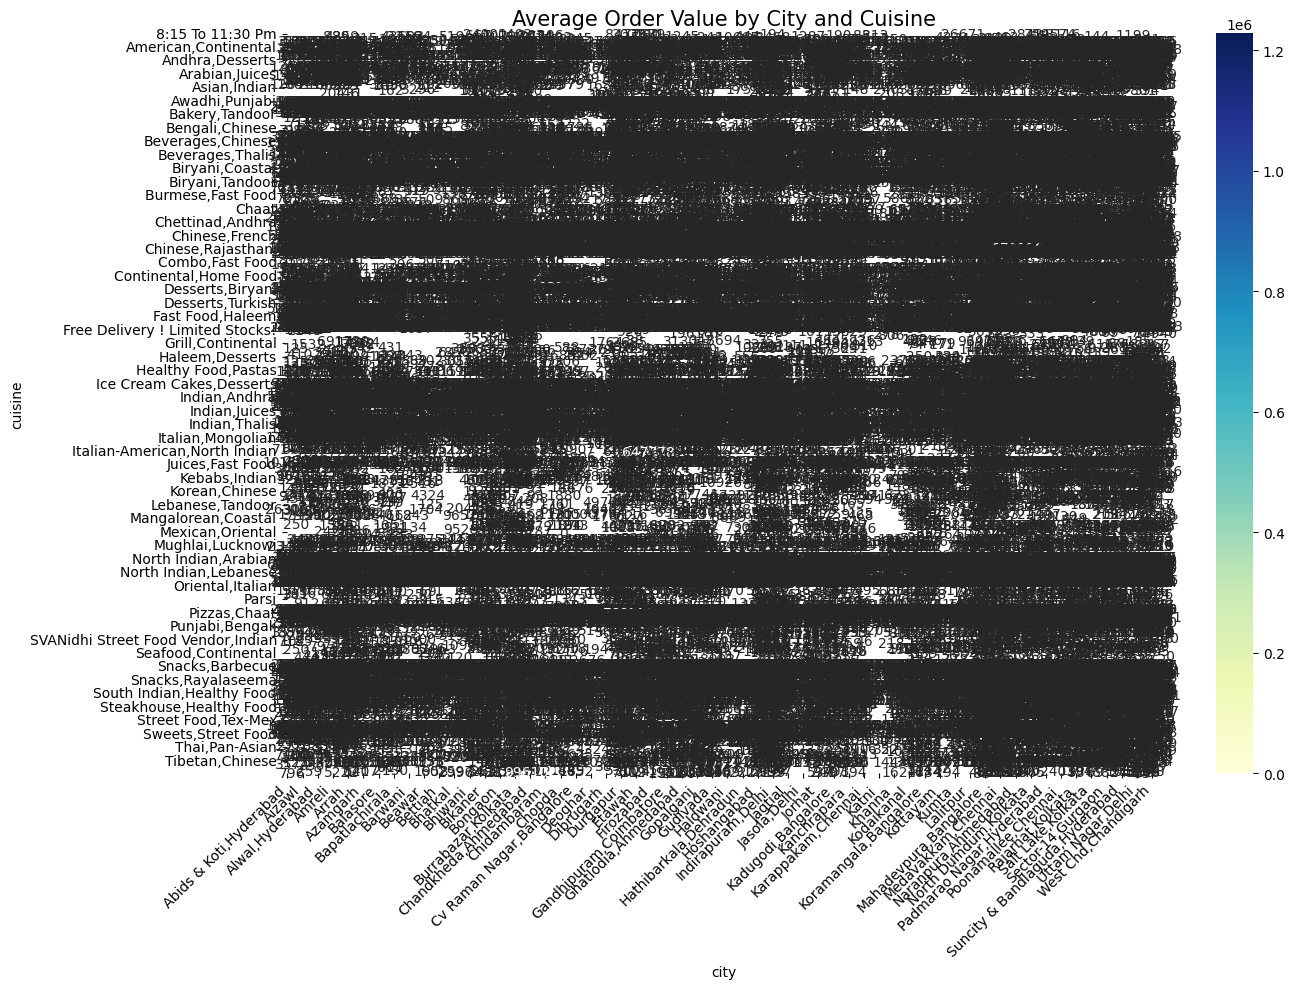

Top 10 City-Cuisine Combinations by Average Order Value:
                            city                  cuisine  average_order_value
11140      Connaught Place,Delhi                 Desserts         1.228148e+06
9793        Chandkheda,Ahmedabad          Waffle,Desserts         9.961020e+05
31539      Navrangpura,Ahmedabad           Chinese,Pizzas         9.701300e+05
15839        Ghatlodia,Ahmedabad                   Sweets         9.701300e+05
13473  Electronic City,Bangalore           Pizzas,Chinese         7.602550e+05
15739        Ghatlodia,Ahmedabad            Chinese,Combo         6.593800e+05
14206                   Fatehpur  Italian-American,Snacks         6.477780e+05
31665      Navrangpura,Ahmedabad       Street Food,Indian         5.218053e+05
15801        Ghatlodia,Ahmedabad     North Indian,Punjabi         4.768982e+05
15401                       Gaya          Chinese,Italian         4.737590e+05

Bottom 10 City-Cuisine Combinations by Average Order Value:
             

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate AOV by city and cuisine
aov_by_city_cuisine = df.groupby(['city', 'cuisine'])['sales_amount'].mean().reset_index()
aov_by_city_cuisine.rename(columns={'sales_amount': 'average_order_value'}, inplace=True)

# Step 2: Calculate overall AOV for each city
city_avg = df.groupby('city')['sales_amount'].mean().reset_index()
city_avg.rename(columns={'sales_amount': 'city_average'}, inplace=True)

# Step 3: Merge AOV with city averages
aov_analysis = pd.merge(aov_by_city_cuisine, city_avg, on='city')

# Step 4: Calculate % difference from city average
aov_analysis['pct_diff_from_city_avg'] = (
    (aov_analysis['average_order_value'] - aov_analysis['city_average']) /
    aov_analysis['city_average'] * 100
)

# Step 5: Visualization - Heatmap
pivot_table = aov_by_city_cuisine.pivot(index='cuisine', columns='city', values='average_order_value')

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.0f', linewidths=0.5)
plt.title('Average Order Value by City and Cuisine', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 6: Print top and bottom AOV combinations
print("Top 10 City-Cuisine Combinations by Average Order Value:")
print(aov_by_city_cuisine.sort_values('average_order_value', ascending=False).head(10))

print("\nBottom 10 City-Cuisine Combinations by Average Order Value:")
print(aov_by_city_cuisine.sort_values('average_order_value').head(10))

# Step 7: Cuisine consistency analysis
cuisine_consistency = aov_analysis.groupby('cuisine')['pct_diff_from_city_avg'].agg(['mean', 'std'])

print("\nCuisines with Consistently Higher Order Values Across Cities:")
print(cuisine_consistency[cuisine_consistency['mean'] > 0].sort_values('std').head(10))


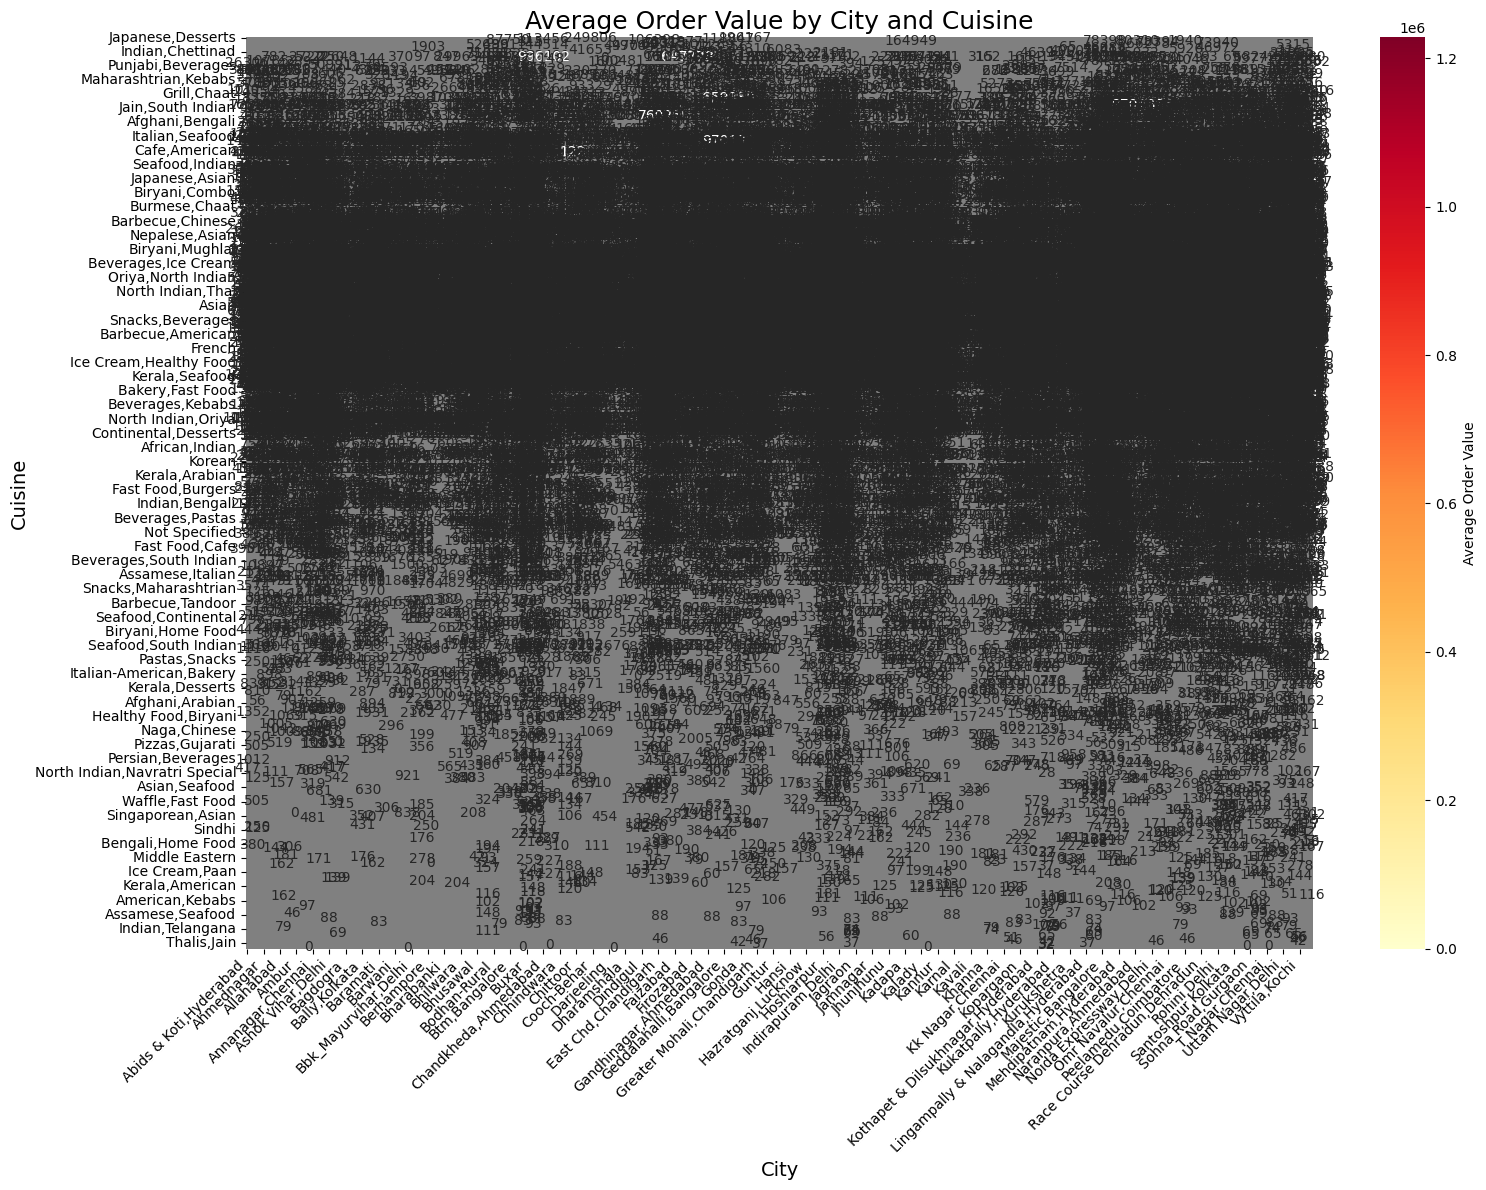

In [ ]:
# Pivot table for heatmap
pivot_table = aov_by_city_cuisine.pivot(index='cuisine', columns='city', values='average_order_value')

# Optional: sort cuisines by their overall average order value
sorted_cuisines = pivot_table.mean(axis=1).sort_values(ascending=False).index
pivot_table = pivot_table.loc[sorted_cuisines]

plt.figure(figsize=(16, 12))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt='.0f',  # Format without decimals
    cmap='YlOrRd',  # More contrast than YlGnBu
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Average Order Value'}
)

plt.title('Average Order Value by City and Cuisine', fontsize=18)
plt.xlabel('City', fontsize=14)
plt.ylabel('Cuisine', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


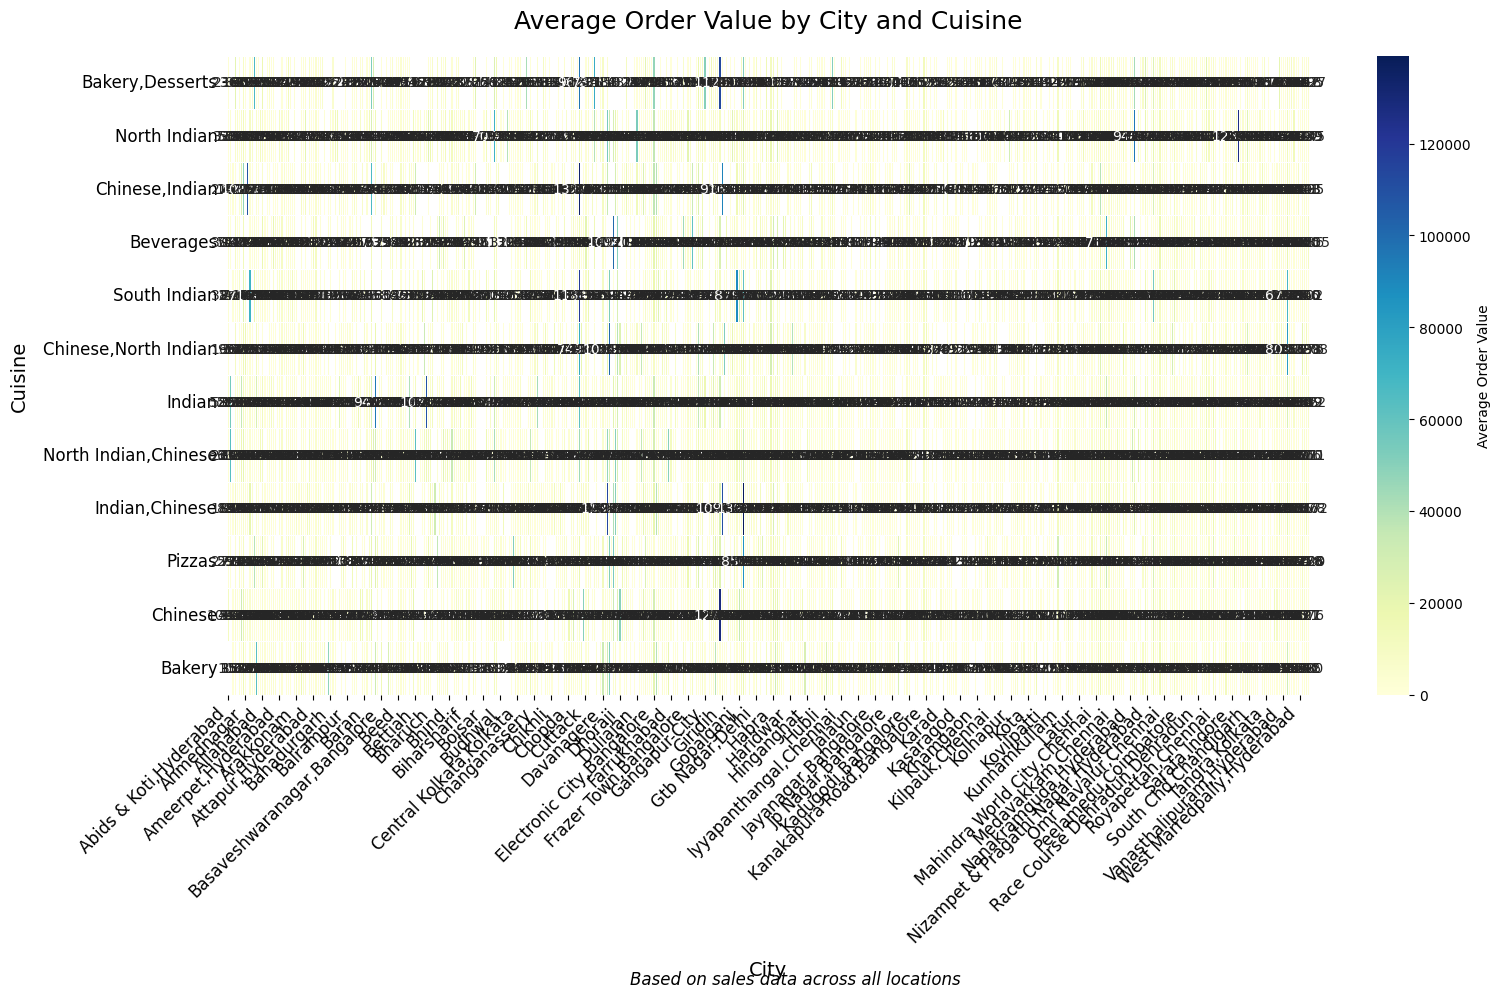

<ipython-input-15-c10756737525>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pct_diff_from_city_avg', y='combo', data=top_diff, palette='viridis')


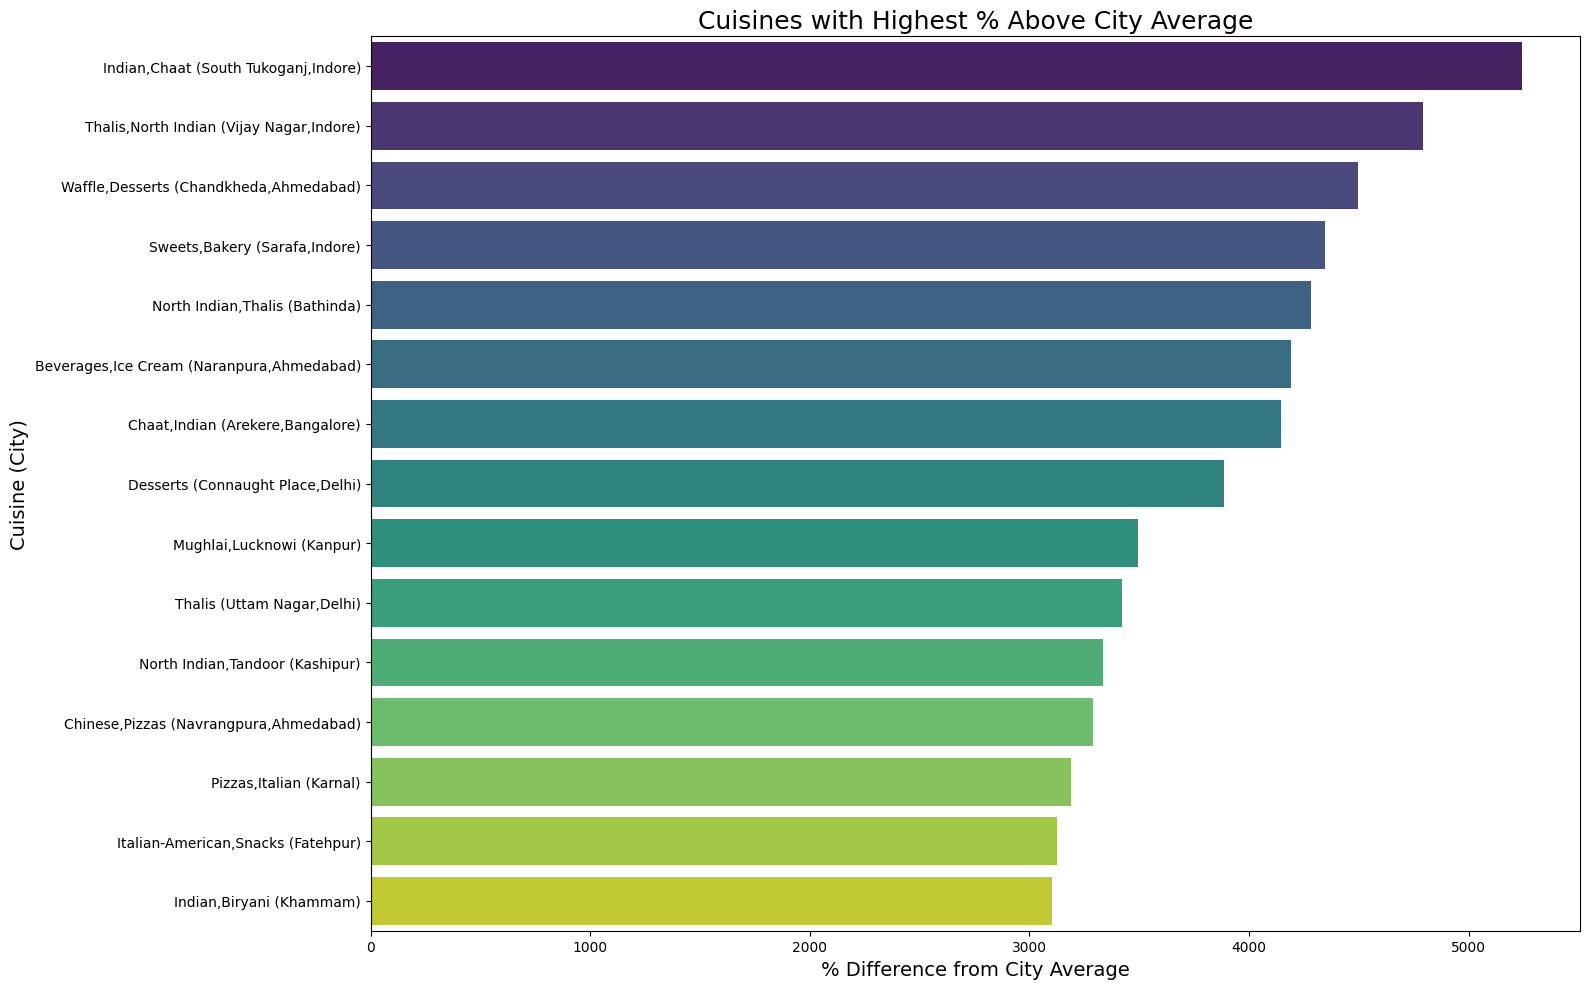

Top 10 City-Cuisine Combinations by Average Order Value:
                            city                  cuisine  average_order_value
11140      Connaught Place,Delhi                 Desserts         1.228148e+06
9793        Chandkheda,Ahmedabad          Waffle,Desserts         9.961020e+05
31539      Navrangpura,Ahmedabad           Chinese,Pizzas         9.701300e+05
15839        Ghatlodia,Ahmedabad                   Sweets         9.701300e+05
13473  Electronic City,Bangalore           Pizzas,Chinese         7.602550e+05
15739        Ghatlodia,Ahmedabad            Chinese,Combo         6.593800e+05
14206                   Fatehpur  Italian-American,Snacks         6.477780e+05
31665      Navrangpura,Ahmedabad       Street Food,Indian         5.218053e+05
15801        Ghatlodia,Ahmedabad     North Indian,Punjabi         4.768982e+05
15401                       Gaya          Chinese,Italian         4.737590e+05

Bottom 10 City-Cuisine Combinations by Average Order Value:
             

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Your data processing steps remain the same
# Step 1: Calculate AOV by city and cuisine
aov_by_city_cuisine = df.groupby(['city', 'cuisine'])['sales_amount'].mean().reset_index()
aov_by_city_cuisine.rename(columns={'sales_amount': 'average_order_value'}, inplace=True)

# Step 2: Calculate overall AOV for each city
city_avg = df.groupby('city')['sales_amount'].mean().reset_index()
city_avg.rename(columns={'sales_amount': 'city_average'}, inplace=True)

# Step 3: Merge AOV with city averages
aov_analysis = pd.merge(aov_by_city_cuisine, city_avg, on='city')

# Step 4: Calculate % difference from city average
aov_analysis['pct_diff_from_city_avg'] = (
    (aov_analysis['average_order_value'] - aov_analysis['city_average']) /
    aov_analysis['city_average'] * 100
)

# Improved visualization approach
# Step 5: Create a more readable heatmap
# Filter for the most common cuisines to reduce clutter (adjust the number as needed)
cuisine_counts = df['cuisine'].value_counts()
top_cuisines = cuisine_counts.nlargest(12).index.tolist()

# Filter the data for top cuisines
filtered_data = aov_by_city_cuisine[aov_by_city_cuisine['cuisine'].isin(top_cuisines)]

# Create the pivot table with the filtered data
pivot_table = filtered_data.pivot(index='cuisine', columns='city', values='average_order_value')

# Sort the cuisines by their average AOV for better readability
cuisine_avg_aov = filtered_data.groupby('cuisine')['average_order_value'].mean().sort_values(ascending=False)
pivot_table = pivot_table.reindex(cuisine_avg_aov.index)

# Create a better heatmap
plt.figure(figsize=(16, 10))
ax = sns.heatmap(
    pivot_table,
    annot=True,
    cmap='YlGnBu',
    fmt='.0f',  # No decimal places for cleaner view
    linewidths=0.5,
    cbar_kws={'label': 'Average Order Value'}
)

# Improve the appearance
plt.title('Average Order Value by City and Cuisine', fontsize=18, pad=20)
plt.xlabel('City', fontsize=14, labelpad=10)
plt.ylabel('Cuisine', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add a subtitle with context
plt.figtext(0.5, 0.01, 'Based on sales data across all locations',
            ha='center', fontsize=12, style='italic')

# Ensure everything fits nicely
plt.tight_layout()

# Show the visualization
plt.show()

# For additional insights, create a bar chart showing percent difference from city average
plt.figure(figsize=(16, 10))

# Get top 10 cuisine-city combinations with highest % difference from city average
top_diff = aov_analysis.sort_values('pct_diff_from_city_avg', ascending=False).head(15)
top_diff['combo'] = top_diff['cuisine'] + ' (' + top_diff['city'] + ')'

# Create the bar chart
sns.barplot(x='pct_diff_from_city_avg', y='combo', data=top_diff, palette='viridis')
plt.title('Cuisines with Highest % Above City Average', fontsize=18)
plt.xlabel('% Difference from City Average', fontsize=14)
plt.ylabel('Cuisine (City)', fontsize=14)
plt.axvline(x=0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

# Print key findings
print("Top 10 City-Cuisine Combinations by Average Order Value:")
print(aov_by_city_cuisine.sort_values('average_order_value', ascending=False).head(10))

print("\nBottom 10 City-Cuisine Combinations by Average Order Value:")
print(aov_by_city_cuisine.sort_values('average_order_value').head(10))

# Cuisine consistency analysis
cuisine_consistency = aov_analysis.groupby('cuisine')['pct_diff_from_city_avg'].agg(['mean', 'std'])
cuisine_consistency = cuisine_consistency[cuisine_consistency.index.isin(df['cuisine'].value_counts()[df['cuisine'].value_counts() > 5].index)]

print("\nCuisines with Consistently Higher Order Values Across Cities:")
print(cuisine_consistency[cuisine_consistency['mean'] > 0].sort_values('std').head(10))

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract neighborhood from address (assuming format like "Area, City")
df['neighborhood'] = df['address'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) and ',' in x else 'Unknown')

# Calculate key metrics by neighborhood
neighborhood_performance = df.groupby(['city', 'neighborhood']).agg({
    'sales_amount': ['sum', 'mean'],  # Total sales and average order value
    'order_date': 'count',  # Order count
    'name': 'nunique',  # Number of restaurants
    'rating': 'mean'  # Average rating
}).reset_index()

# Flatten the multi-level columns
neighborhood_performance.columns = ['_'.join(col).strip('_') for col in neighborhood_performance.columns.values]

# Rename for clarity
neighborhood_performance.rename(columns={
    'sales_amount_sum': 'total_sales',
    'sales_amount_mean': 'average_order_value',
    'order_date_count': 'order_count',
    'name_nunique': 'restaurant_count',
    'rating_mean': 'average_rating'
}, inplace=True)

# Calculate sales per restaurant and orders per restaurant
neighborhood_performance['sales_per_restaurant'] = (neighborhood_performance['total_sales'] /
                                                  neighborhood_performance['restaurant_count'])
neighborhood_performance['orders_per_restaurant'] = (neighborhood_performance['order_count'] /
                                                   neighborhood_performance['restaurant_count'])

# Filter to neighborhoods with meaningful number of restaurants
min_restaurants = 3
significant_neighborhoods = neighborhood_performance[neighborhood_performance['restaurant_count'] >= min_restaurants]

# Sort significant neighborhoods by sales per restaurant within each city
top_neighborhoods = significant_neighborhoods.sort_values(['city', 'sales_per_restaurant'],
                                                         ascending=[True, False])

# Get unique cities and handle the case if there are too many
unique_cities = significant_neighborhoods['city'].unique()
cities_to_plot = unique_cities[:min(6, len(unique_cities))]  # Maximum 6 cities

# Calculate grid dimensions
n_cities = len(cities_to_plot)
n_cols = min(3, n_cities)
n_rows = (n_cities + n_cols - 1) // n_cols  # Ceiling division

# Create figure with appropriate size
plt.figure(figsize=(18, 4 * n_rows))

# Create subplots for each city
for i, city in enumerate(cities_to_plot):
    # Get data for current city
    city_data = significant_neighborhoods[significant_neighborhoods['city'] == city].sort_values(
        'sales_per_restaurant', ascending=False).head(8)  # Top 8 neighborhoods

    # Create subplot
    plt.subplot(n_rows, n_cols, i+1)

    # Create horizontal bar chart for better readability
    ax = sns.barplot(y='neighborhood', x='sales_per_restaurant', data=city_data, palette='viridis')

    # Add value labels to bars
    for j, bar in enumerate(ax.patches):
        width = bar.get_width()
        formatted_value = f"₹{width:,.0f}"
        ax.text(width + (width * 0.02), bar.get_y() + bar.get_height()/2,
                formatted_value, ha='left', va='center')

    # Set title and labels
    plt.title(f'Top Neighborhoods in {city}', fontsize=14, fontweight='bold')
    plt.xlabel('Sales per Restaurant (₹)', fontsize=12)
    plt.ylabel('')

    # Set x-axis limit to make room for labels
    plt.xlim(0, city_data['sales_per_restaurant'].max() * 1.25)

    # Add grid lines for better readability
    plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.suptitle('Top Performing Neighborhoods by Sales per Restaurant', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Make room for the suptitle
plt.savefig('neighborhood_performance.png')  # Save figure in case display doesn't work
plt.close()  # Close the figure

# Find city with most neighborhoods for correlation analysis
city_counts = significant_neighborhoods['city'].value_counts()
main_city = city_counts.index[0] if not city_counts.empty else None

if main_city:
    # Create correlation matrix for neighborhood metrics
    neighborhood_metrics = significant_neighborhoods[significant_neighborhoods['city'] == main_city][
        ['sales_per_restaurant', 'average_order_value', 'orders_per_restaurant', 'average_rating']]

    if not neighborhood_metrics.empty:
        plt.figure(figsize=(10, 8))
        correlation_matrix = neighborhood_metrics.corr()
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Create mask for upper triangle

        # Create improved heatmap
        sns.heatmap(correlation_matrix,
                   annot=True,           # Show values
                   fmt='.2f',            # Format to 2 decimal places
                   cmap='coolwarm',      # Red-blue colormap
                   mask=mask,            # Only show lower triangle
                   linewidths=0.5,
                   cbar_kws={'label': 'Correlation Coefficient'})

        plt.title(f'Correlation Between Performance Metrics in {main_city}', fontsize=15)
        plt.tight_layout()
        plt.savefig('neighborhood_correlation.png')  # Save figure in case display doesn't work
        plt.close()  # Close the figure

# Create a scatter plot showing relationship between metrics
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=significant_neighborhoods,
    x='average_order_value',
    y='orders_per_restaurant',
    size='restaurant_count',
    hue='city',
    sizes=(20, 200),
    alpha=0.7
)

# Annotate points for top performing neighborhoods
top_points = significant_neighborhoods.sort_values('sales_per_restaurant', ascending=False).head(10)
for idx, row in top_points.iterrows():
    plt.annotate(
        row['neighborhood'],
        (row['average_order_value'], row['orders_per_restaurant']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=8,
        bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.3)
    )

plt.title('Neighborhood Performance: Order Volume vs. Average Order Value', fontsize=15)
plt.xlabel('Average Order Value (₹)', fontsize=12)
plt.ylabel('Orders per Restaurant', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('neighborhood_scatter.png')  # Save figure in case display doesn't work
plt.close()  # Close the figure

# Print top performing neighborhoods by city
print("Top Performing Neighborhoods by City (Sales per Restaurant):")
for city in top_neighborhoods['city'].unique():
    print(f"\n{city}:")
    city_data = top_neighborhoods[top_neighborhoods['city'] == city].head(5)
    for i, row in city_data.iterrows():
        print(f"  {row['neighborhood']}: ₹{row['sales_per_restaurant']:,.0f} " +
              f"({row['restaurant_count']} restaurants, {row['average_rating']:.1f} avg rating)")

# Calculate additional neighborhood insights
print("\nNeighborhoods with Highest Average Ratings (min 3 restaurants):")
top_rated = significant_neighborhoods.sort_values('average_rating', ascending=False).head(10)
for i, row in top_rated.iterrows():
    print(f"  {row['neighborhood']} ({row['city']}): {row['average_rating']:.2f}/5 " +
          f"({row['restaurant_count']} restaurants)")

print("\nNeighborhoods with Highest Order Volume per Restaurant:")
highest_volume = significant_neighborhoods.sort_values('orders_per_restaurant', ascending=False).head(10)
for i, row in highest_volume.iterrows():
    print(f"  {row['neighborhood']} ({row['city']}): {row['orders_per_restaurant']:.1f} orders/restaurant" +
          f" (₹{row['average_order_value']:,.0f} avg order)")

# Return summary table of metrics for all significant neighborhoods
summary_table = significant_neighborhoods[['city', 'neighborhood', 'restaurant_count',
                                         'sales_per_restaurant', 'orders_per_restaurant',
                                         'average_order_value', 'average_rating']]
summary_table = summary_table.sort_values(['city', 'sales_per_restaurant'], ascending=[True, False])
# Format numeric columns for display
summary_table['sales_per_restaurant'] = summary_table['sales_per_restaurant'].map('₹{:,.0f}'.format)
summary_table['average_order_value'] = summary_table['average_order_value'].map('₹{:,.0f}'.format)
summary_table['average_rating'] = summary_table['average_rating'].map('{:.1f}'.format)
summary_table['orders_per_restaurant'] = summary_table['orders_per_restaurant'].map('{:.1f}'.format)

print("\nDetailed Neighborhood Performance Summary:")
print(summary_table.head(20).to_string(index=False))

ZeroDivisionError: integer division or modulo by zero

<ipython-input-18-285773d2478e>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='neighborhood', x='sales_per_restaurant', data=city_data, palette='viridis')
<ipython-input-18-285773d2478e>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='neighborhood', x='sales_per_restaurant', data=city_data, palette='viridis')
<ipython-input-18-285773d2478e>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='neighborhood', x='sales_per_restaurant', data=city_data, palette='viridis')
<ipython-input-18-285773d2478e>:83: FutureWarning

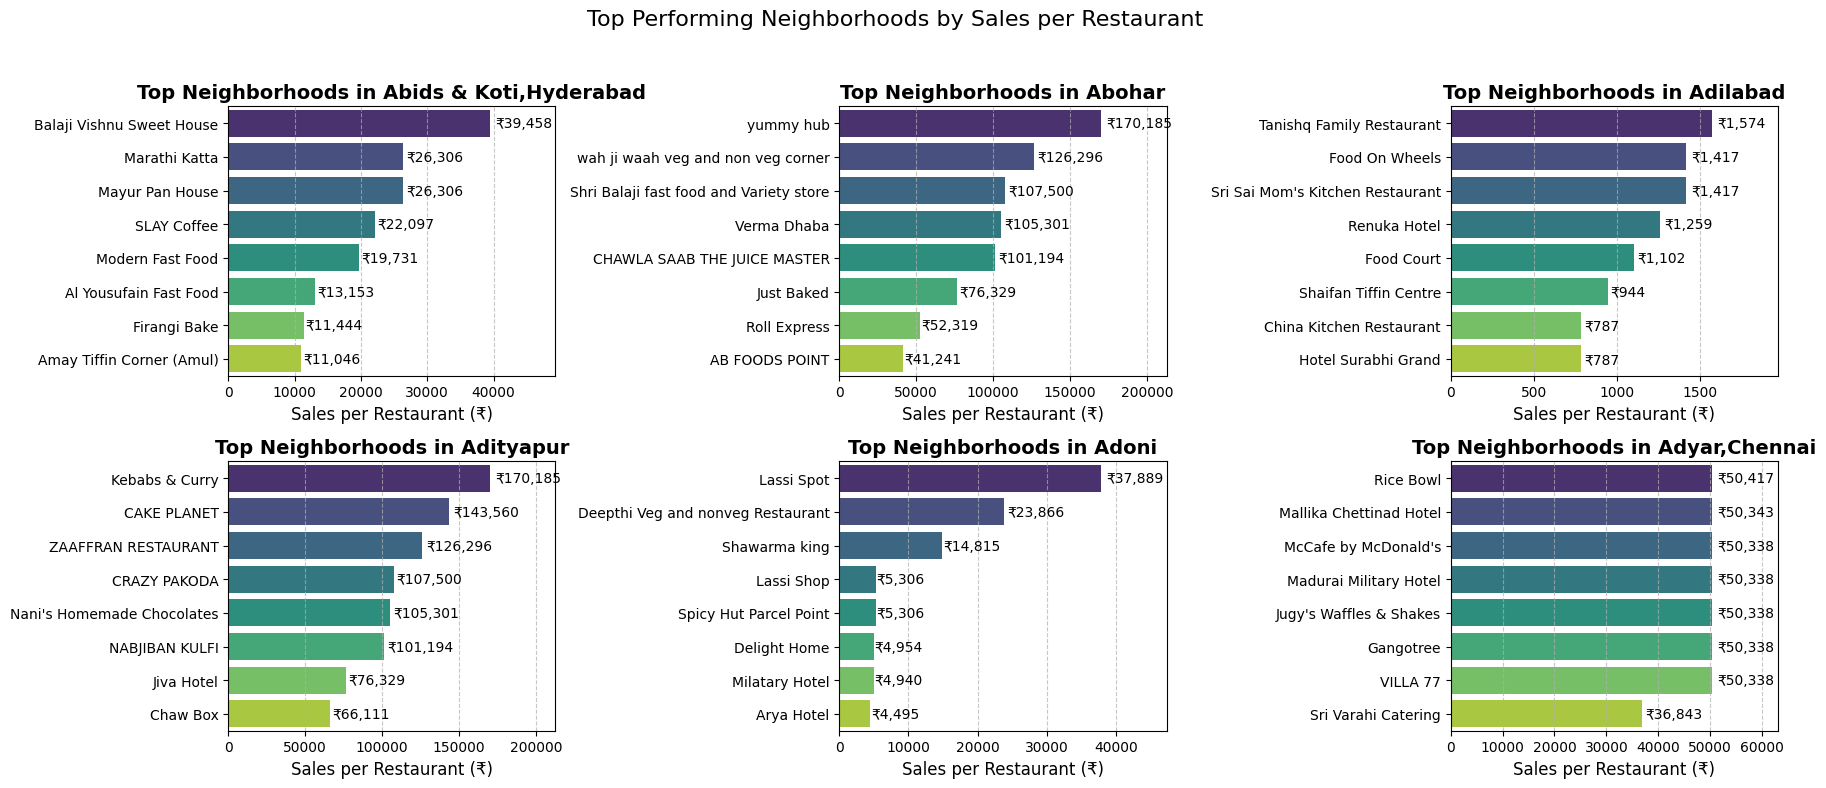

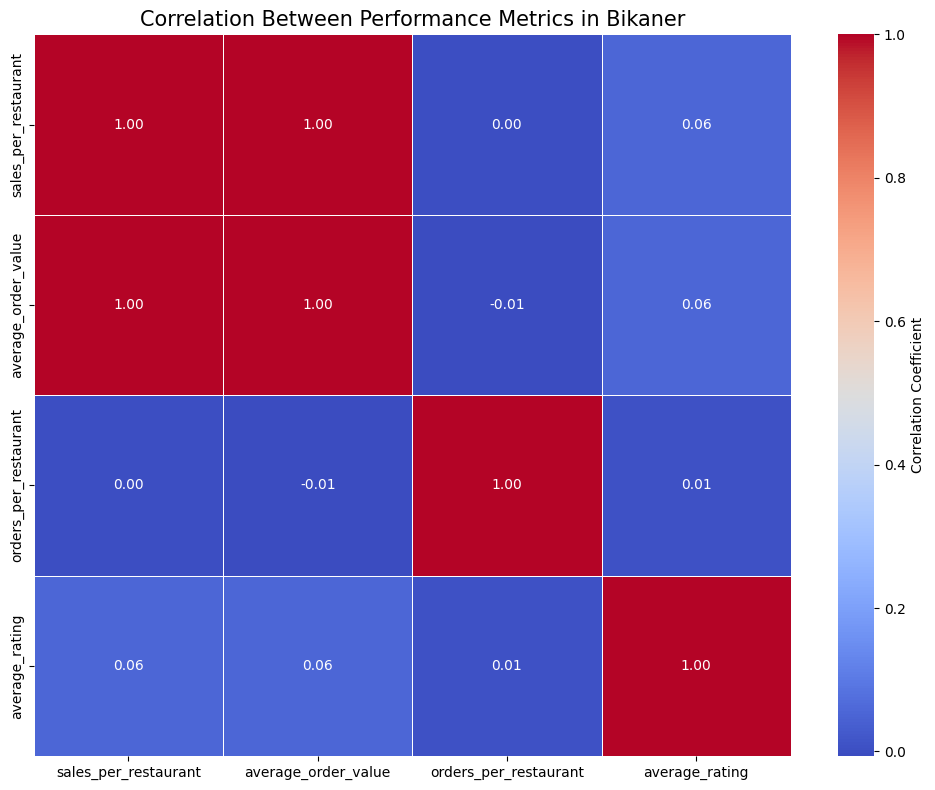

<ipython-input-18-285773d2478e>:168: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


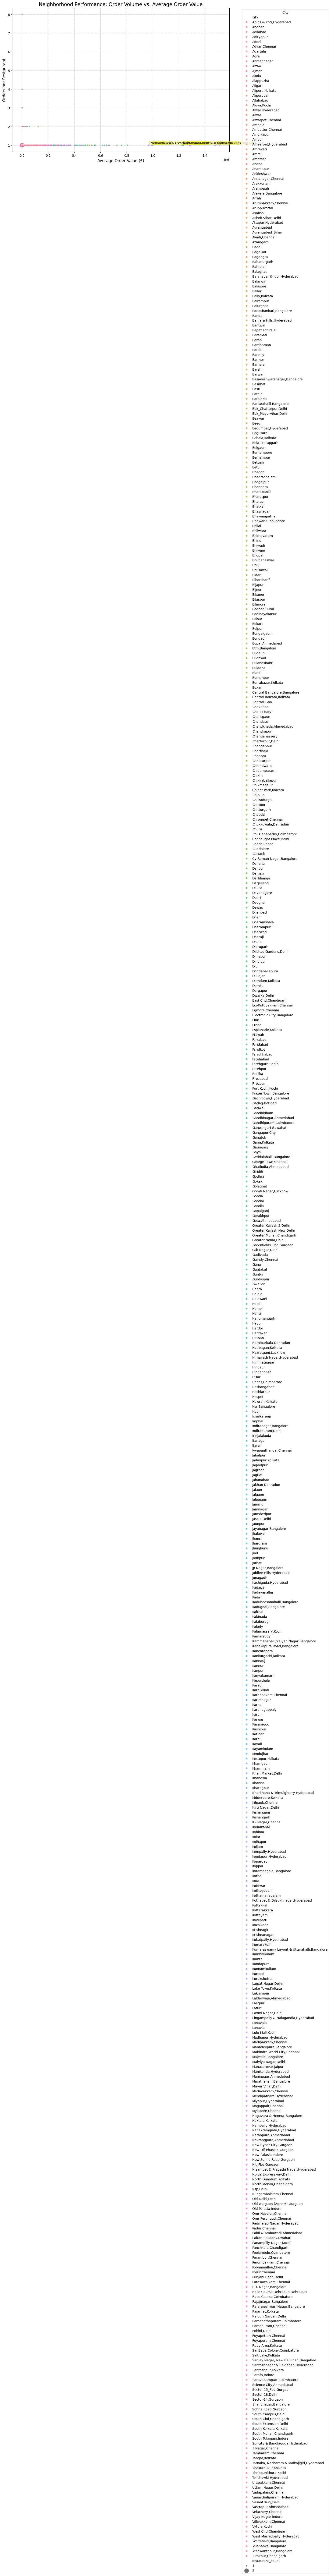

Top Performing Neighborhoods by City (Sales per Restaurant):

Abids & Koti,Hyderabad:
  Balaji Vishnu Sweet House: ₹39,458 (1 restaurants, 3.9 avg rating)
  Marathi Katta: ₹26,306 (1 restaurants, 4.1 avg rating)
  Mayur Pan House: ₹26,306 (1 restaurants, 4.2 avg rating)
  SLAY Coffee: ₹22,097 (1 restaurants, 4.1 avg rating)
  Modern Fast Food: ₹19,731 (1 restaurants, 3.9 avg rating)

Abohar:
  yummy hub: ₹170,185 (1 restaurants, 3.9 avg rating)
  wah ji waah veg and non veg corner: ₹126,296 (1 restaurants, 3.9 avg rating)
  Shri Balaji fast food and Variety store: ₹107,500 (1 restaurants, 3.9 avg rating)
  Verma Dhaba: ₹105,301 (1 restaurants, 3.9 avg rating)
  CHAWLA SAAB THE JUICE MASTER: ₹101,194 (1 restaurants, 3.9 avg rating)

Adilabad:
  Tanishq Family Restaurant: ₹1,574 (1 restaurants, 3.7 avg rating)
  Food On Wheels: ₹1,417 (1 restaurants, 3.9 avg rating)
  Sri Sai Mom's Kitchen Restaurant: ₹1,417 (1 restaurants, 3.3 avg rating)
  Renuka Hotel: ₹1,259 (1 restaurants, 3.1 avg r

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract neighborhood from address (assuming format like "Area, City")
df['neighborhood'] = df['address'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) and ',' in x else 'Unknown')

# Calculate key metrics by neighborhood
neighborhood_performance = df.groupby(['city', 'neighborhood']).agg({
    'sales_amount': ['sum', 'mean'],  # Total sales and average order value
    'order_date': 'count',  # Order count
    'name': 'nunique',  # Number of restaurants
    'rating': 'mean'  # Average rating
}).reset_index()

# Flatten the multi-level columns
neighborhood_performance.columns = ['_'.join(col).strip('_') for col in neighborhood_performance.columns.values]

# Rename for clarity
neighborhood_performance.rename(columns={
    'sales_amount_sum': 'total_sales',
    'sales_amount_mean': 'average_order_value',
    'order_date_count': 'order_count',
    'name_nunique': 'restaurant_count',
    'rating_mean': 'average_rating'
}, inplace=True)

# Calculate sales per restaurant and orders per restaurant
neighborhood_performance['sales_per_restaurant'] = (neighborhood_performance['total_sales'] /
                                                  neighborhood_performance['restaurant_count'])
neighborhood_performance['orders_per_restaurant'] = (neighborhood_performance['order_count'] /
                                                   neighborhood_performance['restaurant_count'])

# Filter to neighborhoods with meaningful number of restaurants
# Start with a minimum threshold, but be adaptive if data is sparse
min_restaurants = 3
significant_neighborhoods = neighborhood_performance[neighborhood_performance['restaurant_count'] >= min_restaurants]

# If we don't have enough data, lower the threshold
if len(significant_neighborhoods) < 5:
    min_restaurants = 2
    significant_neighborhoods = neighborhood_performance[neighborhood_performance['restaurant_count'] >= min_restaurants]
    print(f"Warning: Limited data available. Lowered threshold to neighborhoods with at least {min_restaurants} restaurants.")

# If we still don't have enough data, don't filter at all
if len(significant_neighborhoods) < 5:
    significant_neighborhoods = neighborhood_performance
    print("Warning: Very limited data available. Showing all neighborhoods regardless of restaurant count.")

# Sort significant neighborhoods by sales per restaurant within each city
top_neighborhoods = significant_neighborhoods.sort_values(['city', 'sales_per_restaurant'],
                                                         ascending=[True, False])

# Get unique cities and handle the case if there are too many or none
unique_cities = significant_neighborhoods['city'].unique()

# Check if we have any cities to plot
if len(unique_cities) == 0:
    print("No cities with sufficient data to plot. Check your data filtering criteria.")
else:
    cities_to_plot = unique_cities[:min(6, len(unique_cities))]  # Maximum 6 cities

    # Calculate grid dimensions - handle the case when there are no cities
    n_cities = len(cities_to_plot)
    if n_cities > 0:
        n_cols = min(3, n_cities)
        n_rows = (n_cities + n_cols - 1) // n_cols  # Ceiling division

        # Create figure with appropriate size
        plt.figure(figsize=(18, 4 * n_rows))

        # Create subplots for each city
        for i, city in enumerate(cities_to_plot):
            # Get data for current city
            city_data = significant_neighborhoods[significant_neighborhoods['city'] == city].sort_values(
                'sales_per_restaurant', ascending=False).head(8)  # Top 8 neighborhoods

            # Create subplot
            plt.subplot(n_rows, n_cols, i+1)

            # Create horizontal bar chart for better readability
            ax = sns.barplot(y='neighborhood', x='sales_per_restaurant', data=city_data, palette='viridis')

            # Add value labels to bars
            for j, bar in enumerate(ax.patches):
                width = bar.get_width()
                formatted_value = f"₹{width:,.0f}"
                ax.text(width + (width * 0.02), bar.get_y() + bar.get_height()/2,
                        formatted_value, ha='left', va='center')

            # Set title and labels
            plt.title(f'Top Neighborhoods in {city}', fontsize=14, fontweight='bold')
            plt.xlabel('Sales per Restaurant (₹)', fontsize=12)
            plt.ylabel('')

            # Set x-axis limit to make room for labels
            plt.xlim(0, city_data['sales_per_restaurant'].max() * 1.25)

            # Add grid lines for better readability
            plt.grid(axis='x', linestyle='--', alpha=0.7)

        plt.suptitle('Top Performing Neighborhoods by Sales per Restaurant', fontsize=16, y=0.98)
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Make room for the suptitle
        plt.savefig('neighborhood_performance.png')  # Save figure in case display doesn't work
        plt.show()  # Try to display the figure
        plt.close()  # Close the figure

# Find city with most neighborhoods for correlation analysis
city_counts = significant_neighborhoods['city'].value_counts()
main_city = city_counts.index[0] if not city_counts.empty else None

if main_city and len(significant_neighborhoods[significant_neighborhoods['city'] == main_city]) >= 4:
    # Create correlation matrix for neighborhood metrics
    neighborhood_metrics = significant_neighborhoods[significant_neighborhoods['city'] == main_city][
        ['sales_per_restaurant', 'average_order_value', 'orders_per_restaurant', 'average_rating']]

    if not neighborhood_metrics.empty:
        plt.figure(figsize=(10, 8))
        correlation_matrix = neighborhood_metrics.corr()

        # Create improved heatmap
        sns.heatmap(correlation_matrix,
                   annot=True,           # Show values
                   fmt='.2f',            # Format to 2 decimal places
                   cmap='coolwarm',      # Red-blue colormap
                   linewidths=0.5,
                   cbar_kws={'label': 'Correlation Coefficient'})

        plt.title(f'Correlation Between Performance Metrics in {main_city}', fontsize=15)
        plt.tight_layout()
        plt.savefig('neighborhood_correlation.png')  # Save figure in case display doesn't work
        plt.show()  # Try to display the figure
        plt.close()  # Close the figure

# Create a scatter plot if we have enough data
if len(significant_neighborhoods) >= 5:
    plt.figure(figsize=(12, 8))
    scatter = sns.scatterplot(
        data=significant_neighborhoods,
        x='average_order_value',
        y='orders_per_restaurant',
        size='restaurant_count',
        hue='city',
        sizes=(20, 200),
        alpha=0.7
    )

    # Add a legend
    plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Annotate points for top performing neighborhoods
    top_points = significant_neighborhoods.sort_values('sales_per_restaurant', ascending=False).head(10)
    for idx, row in top_points.iterrows():
        plt.annotate(
            row['neighborhood'],
            (row['average_order_value'], row['orders_per_restaurant']),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=8,
            bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.3)
        )

    plt.title('Neighborhood Performance: Order Volume vs. Average Order Value', fontsize=15)
    plt.xlabel('Average Order Value (₹)', fontsize=12)
    plt.ylabel('Orders per Restaurant', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('neighborhood_scatter.png')  # Save figure in case display doesn't work
    plt.show()  # Try to display the figure
    plt.close()  # Close the figure

# Print top performing neighborhoods by city - handle empty case
if not top_neighborhoods.empty:
    print("Top Performing Neighborhoods by City (Sales per Restaurant):")
    for city in top_neighborhoods['city'].unique():
        print(f"\n{city}:")
        city_data = top_neighborhoods[top_neighborhoods['city'] == city].head(5)
        for i, row in city_data.iterrows():
            print(f"  {row['neighborhood']}: ₹{row['sales_per_restaurant']:,.0f} " +
                f"({row['restaurant_count']} restaurants, {row['average_rating']:.1f} avg rating)")
else:
    print("No neighborhood data available for analysis.")

# Only print additional insights if we have data
if len(significant_neighborhoods) >= 5:
    # Calculate additional neighborhood insights
    print("\nNeighborhoods with Highest Average Ratings:")
    top_rated = significant_neighborhoods.sort_values('average_rating', ascending=False).head(10)
    for i, row in top_rated.iterrows():
        print(f"  {row['neighborhood']} ({row['city']}): {row['average_rating']:.2f}/5 " +
            f"({row['restaurant_count']} restaurants)")

    print("\nNeighborhoods with Highest Order Volume per Restaurant:")
    highest_volume = significant_neighborhoods.sort_values('orders_per_restaurant', ascending=False).head(10)
    for i, row in highest_volume.iterrows():
        print(f"  {row['neighborhood']} ({row['city']}): {row['orders_per_restaurant']:.1f} orders/restaurant" +
            f" (₹{row['average_order_value']:,.0f} avg order)")

    # Return summary table of metrics for all significant neighborhoods
    summary_table = significant_neighborhoods[['city', 'neighborhood', 'restaurant_count',
                                            'sales_per_restaurant', 'orders_per_restaurant',
                                            'average_order_value', 'average_rating']]
    summary_table = summary_table.sort_values(['city', 'sales_per_restaurant'], ascending=[True, False])
    # Format numeric columns for display
    summary_table['sales_per_restaurant'] = summary_table['sales_per_restaurant'].map('₹{:,.0f}'.format)
    summary_table['average_order_value'] = summary_table['average_order_value'].map('₹{:,.0f}'.format)
    summary_table['average_rating'] = summary_table['average_rating'].map('{:.1f}'.format)
    summary_table['orders_per_restaurant'] = summary_table['orders_per_restaurant'].map('{:.1f}'.format)

    print("\nDetailed Neighborhood Performance Summary:")
    print(summary_table.head(20).to_string(index=False))
else:
    print("Insufficient data for detailed neighborhood analysis.")

# Print some basic stats about the dataset for debugging
print("\nDataset Overview:")
print(f"Total cities in dataset: {df['city'].nunique()}")
print(f"Total neighborhoods extracted: {df['neighborhood'].nunique()}")
print(f"Neighborhoods with at least {min_restaurants} restaurants: {significant_neighborhoods['neighborhood'].nunique()}")

In [19]:
# Extract neighborhood from address (assuming format like "Area, City")
df['neighborhood'] = df['address'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) and ',' in x else 'Unknown')

# Calculate key metrics by neighborhood
neighborhood_performance = df.groupby(['city', 'neighborhood']).agg({
    'sales_amount': ['sum', 'mean'],  # Total sales and average order value
    'order_date': 'count',  # Order count
    'name': 'nunique',  # Number of restaurants
    'rating': 'mean'  # Average rating
}).reset_index()

# Flatten the multi-level columns
neighborhood_performance.columns = ['_'.join(col).strip('_') for col in neighborhood_performance.columns.values]

# Rename for clarity
neighborhood_performance.rename(columns={
    'sales_amount_sum': 'total_sales',
    'sales_amount_mean': 'average_order_value',
    'order_date_count': 'order_count',
    'name_nunique': 'restaurant_count',
    'rating_mean': 'average_rating'
}, inplace=True)

# Calculate sales per restaurant and orders per restaurant
neighborhood_performance['sales_per_restaurant'] = (neighborhood_performance['total_sales'] /
                                                  neighborhood_performance['restaurant_count'])
neighborhood_performance['orders_per_restaurant'] = (neighborhood_performance['order_count'] /
                                                   neighborhood_performance['restaurant_count'])

# Filter to neighborhoods with meaningful number of restaurants
min_restaurants = 3
significant_neighborhoods = neighborhood_performance[neighborhood_performance['restaurant_count'] >= min_restaurants]

# Find top performing neighborhoods by city
top_neighborhoods = significant_neighborhoods.sort_values(['city', 'sales_per_restaurant'],
                                                         ascending=[True, False])

# Visualization - top 3 neighborhoods by city
plt.figure(figsize=(16, 10))
for i, city in enumerate(significant_neighborhoods['city'].unique()[:6]):  # Top 6 cities
    plt.subplot(2, 3, i+1)
    city_data = significant_neighborhoods[significant_neighborhoods['city'] == city].sort_values(
        'sales_per_restaurant', ascending=False).head(3)  # Only top 3

    sns.barplot(x='neighborhood', y='sales_per_restaurant', data=city_data, palette='viridis')
    plt.title(f'Top 3 Neighborhoods in {city}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Sales per Restaurant (₹)')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Map visualization for a specific city (example with most data)
main_city = significant_neighborhoods['city'].value_counts().index[0]

# Create correlation matrix for neighborhood metrics
neighborhood_metrics = significant_neighborhoods[significant_neighborhoods['city'] == main_city][
    ['sales_per_restaurant', 'average_order_value', 'orders_per_restaurant', 'average_rating']]

plt.figure(figsize=(10, 8))
sns.heatmap(neighborhood_metrics.corr(), annot=True, cmap='coolwarm')
plt.title(f'Correlation Between Neighborhood Performance Metrics in {main_city}', fontsize=15)
plt.tight_layout()
plt.show()

# Print top 3 performing neighborhoods by city
print("Top 3 Performing Neighborhoods by City (Sales per Restaurant):")
for city in top_neighborhoods['city'].unique():
    print(f"\n{city}:")
    city_data = top_neighborhoods[top_neighborhoods['city'] == city].head(3)  # Only top 3
    for i, row in city_data.iterrows():
        print(f"  {row['neighborhood']}: ₹{row['sales_per_restaurant']:,.0f} " +
              f"({row['restaurant_count']} restaurants, {row['average_rating']:.1f} avg rating)")

<Figure size 1600x1000 with 0 Axes>

IndexError: index 0 is out of bounds for axis 0 with size 0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   name            100000 non-null  object        
 1   city            100000 non-null  object        
 2   rating          100000 non-null  float64       
 3   cuisine         100000 non-null  object        
 4   link            100000 non-null  object        
 5   address         100000 non-null  object        
 6   item            100000 non-null  object        
 7   order_date      100000 non-null  datetime64[ns]
 8   sales_amount    100000 non-null  int64         
 9   month           100000 non-null  object        
 10  year            100000 non-null  int64         
 11  age             100000 non-null  int64         
 12  gender          100000 non-null  object        
 13  marital_status  100000 non-null  object        
 14  occupation      100000 non-null  obje

In [21]:
top_5_items = df['item'].value_counts().head(5)
print("Top 5 most frequently ordered items:\n", top_5_items)

Top 5 most frequently ordered items:
 item
Burmese Spaghetti    2
Masala Omlet         2
Veg Paneer Roll      2
Hong Kong Rice       2
Biryani              2
Name: count, dtype: int64


In [22]:
average_rating = df['rating'].mean()
print(f"Average rating of restaurants: {average_rating}")

Average rating of restaurants: 3.905140811455847


In [23]:
city_sales = df.groupby('city')['sales_amount'].sum()
highest_sales_city = city_sales.idxmax()
highest_sales_amount = city_sales.max()
print(f"City with the highest total sales: {highest_sales_city} (Total Sales: {highest_sales_amount})")

City with the highest total sales: Electronic City,Bangalore (Total Sales: 28599623)


In [24]:
order_frequency = df['name'].value_counts()
print("Order frequency per customer:\n", order_frequency.describe())
# You can further analyze this using histograms or other visualizations

Order frequency per customer:
 count    76553.000000
mean         1.306285
std          3.195995
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        287.000000
Name: count, dtype: float64


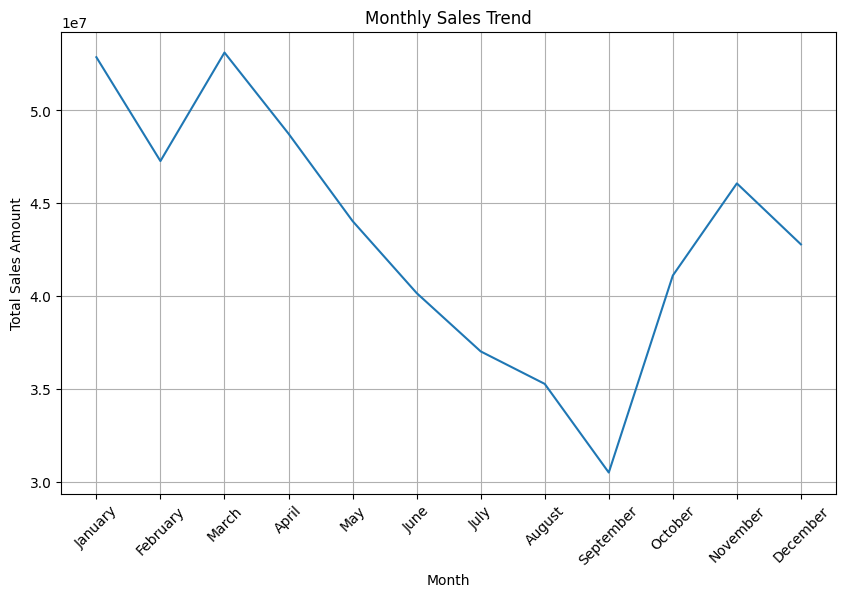

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure 'month' is in the correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_sales = df.groupby('month')['sales_amount'].sum().reindex(month_order)  # Ensure correct order

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.grid(True)
plt.show()

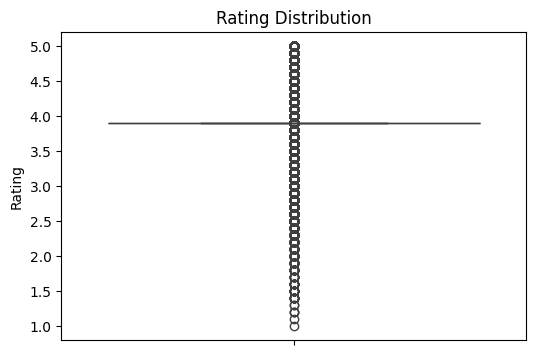

In [27]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['rating'])
plt.title('Rating Distribution')
plt.ylabel('Rating')
plt.show()

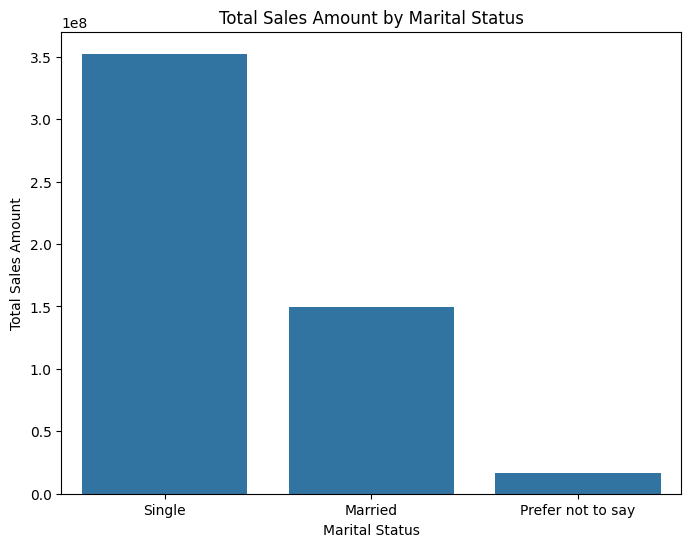

In [28]:
marital_status_sales = df.groupby('marital_status')['sales_amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=marital_status_sales.index, y=marital_status_sales.values)
plt.title('Total Sales Amount by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Sales Amount')
plt.show()

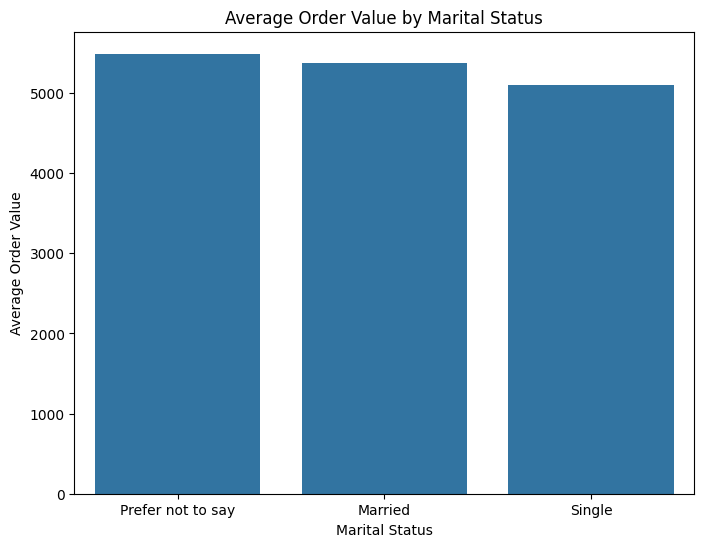

In [29]:
marital_status_avg_sales = df.groupby('marital_status')['sales_amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=marital_status_avg_sales.index, y=marital_status_avg_sales.values)
plt.title('Average Order Value by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Order Value')
plt.show()